# 03 - Distribuições de Probabilidade

Nessa aula, iremos tratar dos seguintes conteúdos:
- Tipos de Variáveis Aleatórias
- Esperança e Variância
- Distribuição de Probabilidade
- Distribuição - Bernoulli e Binomial
- Distribuição Poisson
- Distribuição Exponencial
- Distribuição Uniforme

<img src = "https://miro.medium.com/max/450/1*FSuKbxt4bLeqTrlbhg3hQQ.gif">

<img src = "http://storage.ning.com/topology/rest/1.0/file/get/1490420457?profile=original" width=800>

## 

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
from scipy import stats # import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

## Tipos de Variáveis Aleatórias


<br>

Vimos que uma __variável aleatória__ é uma variável cujo valor depende de fatores não determinísticos, ou melhor dizendo __probabilísticos__. Detalhando um pouco mais sobre as variáveis aleatórias, existem dois tipos mais comuns que vamos trabalhar no nosso curso, sendo elas:

- __Discreta:__ são as variáveis aleatórias que a distribuição de probabilidade assume apenas valores enumeráveis;

- __Contínua:__ são as variáveis aleatórias que a distribuição de probabilidade assume valores contínuos dentro de um intervalo pré-determinado.

Mas para realmente entendermos a diferença entre cada uma delas, precisamos definir o que são __distribuições de probabilidade__.

## 

## Distribuições de Probabilidade

<br>

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

A representação matemática para a distribuição de probabilidade é feita utilizando o que chamamos de __função de densidade de probabilidade__. Para cada um dos casos de variáveis aleatórias temos uma definição de densidade de probabilidade, conforme veremos agora:

- __Discretas:__ Para o caso das variáveis aleatórias discretas a definição matemática para a função de densidade de probabilidade, pode ser dada da seguinte forma:

$$ P(X = x) = F(X) $$

Ou seja, para o caso discreto, a variável aleatória assume é uma função que assume um valor real para cada elemento do espaço amostral. Partir das definições gerais para probabilidade, são conhecidas as seguintes são sempre válidas:

- $ 0 \leq P(X = x) \leq 1 $;

<br>

- $ P(X = x) \geq 0 $;

<br>

- $ \sum_{i=1}^{\infty} P(X = x_{i}) = 1 $ ;

<br>

- $ P(a \leq X \leq b) = \sum_{x = a}^{x = b} P(X = x)$;

## 

- __Contínuas:__ Para o caso das variáveis aleatórias contínuas a definição matemática para a função de densidade de probabilidade, pode ser dada da seguinte forma:

$$ P(X) = \int p(x) \,dx $$

Da mesma forma que para o caso discreto, vamos definir algumas relações conhecidas as v. a. contínuas:

- $ p(x) \geq 0, \forall x \in \mathbb{R}$;

<br>

- $ \int_{-\infty}^{\infty} p(x) \,dx = 1 $ ;

<br>

- $ P(a \leq X \leq b) = \int_{a}^{b} p(x) \,dx$;

<br>

Uma outra forma de interpretarmos a probabilidade de uma dada distribuição entre o intervalo $a$ e $b$, seria como a área abaixo ao gráfico da função de densidade de probabilidade:

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>


## 

## Valor Esperado (Esperança) e Variância

<br>

Assim como no caso da Estatística Descritiva, no casos de modelos probabilísticos também existem parâmetros de posição e variabilidade utilizada para caracterizar uma distribuição de probabilidade:

- __Valor Esperado (Esperança):__ O valor esperado seria o produto da variável aleatória $x$ e sua respectiva probabilidade, funcionando como se fosse uma média ponderada para as probabilidades. O cálculo do valor esperado é definido da seguinte forma:


__Caso Discreto:__  $ E[X] = \sum xP(X = x) $


__Caso Contínuo:__  $ E[X] = \int xp(x) dx $

<br><br>

- __Variância:__ A variância é o valor que mede a variabilidade, ou seja o quão dispersão estão as probabilidade em relação ao valor esperado. A variância é definida da seguinte forma:

<br>

$$ V[X] = \sigma^{2} = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

<br>
Onde, $ E[X^2] = \sum x^2P(X = x)$.

__Exemplo:__ Seja a variável aleatória X com distribuição abaixo, calcule $E[X]$ e $V[X]$:
 
- P(X = 1) = 0.3
- P(X = 2) = 0.4
- P(X = 3) = 0.2 
- P(X = 4) = 0.1

In [12]:
# Vetor de eventos
X = [1, 2, 3, 4]

# Vetor de probabilidade
P = [0.3, 0.4, 0.2, 0.1]

# Valor esperado
esp   = np.dot(X, P)

# print do valor esperado
print("Valor esperado: ", np.round(esp, 2))

#Variância
var = np.round(np.dot(np.power(X, 2), P) - np.power(esp, 2), 2)

# print da variância
print("Variância:      ", np.dot(np.power(X, 2), P) - np.power(esp, 2))

# print da variância
print("Variância:      ", var)

Valor esperado:  2.1
Variância:       0.8900000000000006
Variância:       0.89


__Exemplo:__ A variável X tem função de densidade de probabilidade dada por:

- $f(x) = \frac{x^2}{3}$, se $ -1 \leq x \leq 2$, caso contrário seria 0.

In [13]:
from scipy.integrate import quad

# Função para a equação do valor esperado
def f1(x):
    return x*(x*x)/3


# Calculo da integral e o erro
esp, err1 = quad(f1, -1, 2)

# Print do Valor esperado
print("Valor Esperado: ", esp)
print("Erro da Integral: ", err1)

# Função para a equação do valor esperado x^2


def f2(x):
    return (x*x)*(x*x)/3


# Integral de x^2
esp_x2, err2 = quad(f2, -1, 2)

# Calculo da variância
var = esp_x2 - esp*esp

# Print da Variância
print("Variância:      ", var)
print("Erro da Integral: ", err2)

Valor Esperado:  1.25
Erro da Integral:  1.5728145305099745e-14
Variância:       0.6375000000000002
Erro da Integral:  2.4424906541753447e-14


## 

## Distribuições

Nos próximos tópicos, vamos apresentar algumas das principais distribuições utilizadas!

## 

## Distribuição de Bernoulli/Binomial

A distribuição de Bernoulli  é uma distribuição discreta para um espaço amostral $k \in \{0, 1\}$, baseando a probabilidade em __sucessos__ e __falhas__. Onde a probabilidade de sucesso de um evento ($k = 1$) é igual a $p$ e a probabilidade de falha ($k = 0$) seria o valor complementar $1 - p$. A função que descreve a distribuição de Bernoulli pode ser definida como:

<br>

$$ P(X = k) = p^{k}(1-p)^{(1-k)} $$

<br>
Os valores para o valor esperado e a variância para a distribuição de Bernoulli serão respectivamente:

- __Valor Esperado:__ $ E[X] = p $;

- __Variância:__ $ V[X] = p(1-p)$.

<br>

Mas o caso da distribuição de Bernoulli, tratamos apenas para um evento isolado, como por exemplo o lançamento de uma moeda. Quando trabalhamos com eventos __com repetições__, utiliza-se o caso geral da distribuição de Bernoulli que seria uma __Distribuição Binomial.__


### Distribuição Binomial

Seja a variável aleatória baseado em $n$ repetições de Bernoulli, temos que a definição da distribuição Binomial é dada por:

$$ P(X = k) = \binom{n}{k}p^{k}(1-p)^{(n-k)} = \frac{n!}{k!(n - k)!}p^{k}(1-p)^{(n-k)}$$

<br>
Os valores para o valor esperado e a variância para a distribuição Binomial serão respectivamente:

- __Valor Esperado:__ $ E[X] = np $;

- __Variância:__ $ V[X] = np(1-p)$.

__Exemplo:__ Em uma caixa há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição. Calcule a probabilidade de que:

__A)__ saiam duas bolas brancas:

In [15]:
from math import factorial


def binomial(n, p, k):
    C = (factorial(n)/(factorial(n-k)*factorial(k)))
    return C*np.power(p, k)*np.power(1-p, n-k)


# numero de retiradas
n = 5

# numero de bolas brancas (sucesso)
k = 2

# probabilidade de um bola branca sair

p = 8/12

# print do resultado teorico
print("A probabilidade será: ", np.round(binomial(n, p, k), 4))

A probabilidade será:  0.1646


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [21]:
from scipy import stats

# numero de retiradas
n = 5

# numero de bolas brancas (sucesso)
k = 2

# probabilidade de um bola branca sair

p = 8/12

# X~Bin(5, 8/12)
# P(X = 2)
rv = stats.binom(n, p)
rv.pmf(k)

# print do resultado teorico
print("A probabilidade será: ", rv.pmf(k))

A probabilidade será:  0.16460905349794244


__B)__ saiam pelo menos 3 pretas:

In [22]:
# numero de retiradas
n = 5

# probabilidade de um bola preta sair

p = 4/12

# k = 3, k = 4, k = 5
# Calc p(k=3) somar com p(k=4) e somar com p(k=5)
prop = 0
for k in range(3, 6):
    prop += binomial(n, p, k)
    
# Print da probabilidade
print("A probabilidade será: ", np.round(prop, 4))

A probabilidade será:  0.2099


In [26]:
from scipy import stats

# numero de retiradas
n = 5

# probabilidade de um bola branca sair

p = 4/12

k = 3
rv = stats.binom(n, p)
rv.pmf(k)


# print do resultado teorico
print("A probabilidade será: ", rv.pmf(3)+rv.pmf(4)+rv.pmf(5))

A probabilidade será:  0.2098765432098764


## 

## Distribuição de Poisson

Uma variável aleatória tem distribuição de Poisson quando podemos descrever um evento em relação ao uma taxa/contagem de ocorrência, normalmente chamada de $ \lambda $, sendo $ \lambda > 0$. Dessa forma a equação para a distribuição de Poisson será definida como:

$$ P(X = k) = \frac{e^{-\lambda}\lambda^{k}}{k!} $$

<br>
Os valores para o valor esperado e a variância para a distribuição de Poisson serão respectivamente:

- __Valor Esperado:__ $ E[X] = \lambda $;

- __Variância:__ $ V[X] = \lambda$.

__Exemplo:__ Em uma central telefônica chegam 300 ligações por hora. Sabendo que segue uma distribuição de Poisson, qual é a probabilidade de que:
   
__A)__ Em um minuto não ocorra ligações;

In [28]:
def Poisson(lbd, k):
    return np.exp(-lbd)*(lbd**k)/factorial(k)


lbd = 5  # 300 chamadas / 60 minutos = 5 chamadas por minuto

k = 0  # evento - frequencia procurada


print("P(k = 0) = ", Poisson(lbd,k))

P(k = 0) =  0.006737946999085467


In [27]:
lbd = 5  # 300 chamadas / 60 minutos = 5 chamadas por minuto

k = 0  # evento - frequencia procurada

rv = stats.poisson(lbd)
rv.pmf(k)

print("P(k = 0) = ", rv.pmf(k))

P(k = 0) =  0.006737946999085467


__B)__ Em 2 minutos ocorram 2 chamadas;

In [32]:
lbd = 10  # 5 chamadas por minuto = Em 2 minutos tenho 10 chamadas

k = 8  # evento - frequencia procurada

rv = stats.poisson(lbd)
rv.pmf(k)

print("P(k = 2) = ", rv.pmf(k))


P(k = 2) =  0.11259903214902009


## 

## Distribuição Exponencial

Uma variável aleatória continua tem uma distribuição Exponencial quando queremos avaliar o tempo decorrido entre dois eventos consecutivos, diferente do Poisson que avalia de acordo com uma contagem de ocorrências em um espaço de tempo. A função densidade de probabilidade que descreve a distribuição exponencial pode ser descrita como:

$$ f(x) = \alpha e^{-\alpha x}, x \geq 0 $$

No caso para $x < 0$, a probabilidade de $f(x) = 0$

<br>
Os valores para o valor esperado e a variância para a distribuição exponencial serão respectivamente:

- __Valor Esperado:__ $ E[X] = \frac{1}{\alpha} $;

- __Variância:__ $ V[X] = \frac{1}{\alpha^2}$.


__Exemplo:__ O intervalo de tempo, em minutos, entre emissões consecutivas de uma fonte radioativa é uma variável aleatória contínua que segue uma distribuição exponencial com parâmetro $\alpha = 0.2$. Qual a probabilidade de que ocorra uma emissão em um intervalo inferior a 2 minutos?

In [34]:
# função de densidade exponencial
def f3(x):
    # Parametro alpha
    alpha = 0.2
    return alpha * np.exp(-alpha * x)


# Integral da função de densidade
prop, err2 = quad(f3, 0, 2)

# Print da Probabilidade
print("Valor teórico da probabilidade é: ", np.round(prop, 4))


Valor teórico da probabilidade é:  0.3297


In [40]:
# CONFERIR

# # parâmetro
# alpha = 0.2

# k = 2

# rv = stats.expon(alpha)
# rv.pdf(k)

# rv.pdf(2)

0.16529888822158653

## 

## Distribuição Uniforme

A distribuição uniforme é uma distribuição bem simples e não possui parâmetros, a única diferença é que só vai haver probabilidade para um determinado evento $x$, se $x \in [a, b]$. Dessa forma a equação de densidade de probabilidade para a distribuição uniforme é dado por:

$$ f(x) = \frac{1}{b - a}, a \leq x \leq b $$

E para o caso de $x \notin [a, b]$, a função de densidade será $f(x) = 0$

<br>
Os valores para o valor esperado e a variância para a distribuição exponencial serão respectivamente:

- __Valor Esperado:__ $ E[X] = \frac{a + b}{2} $;

- __Variância:__ $ V[X] = \frac{(b - a)^2}{12}$.


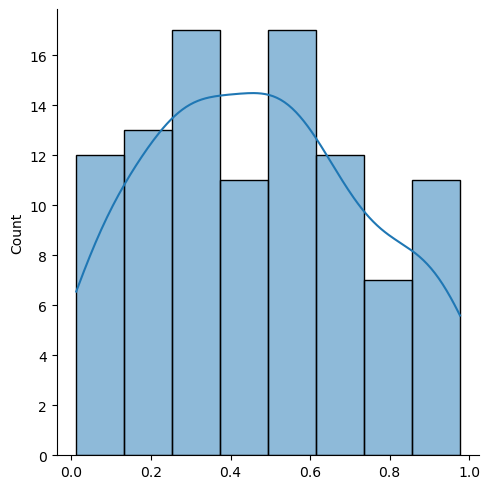

In [43]:
# simulação de uma distribuição uniforme
N = 100

amostra_uniform = np.random.uniform(0, 1, N)

sns.displot(amostra_uniform, kde=True)

plt.show()

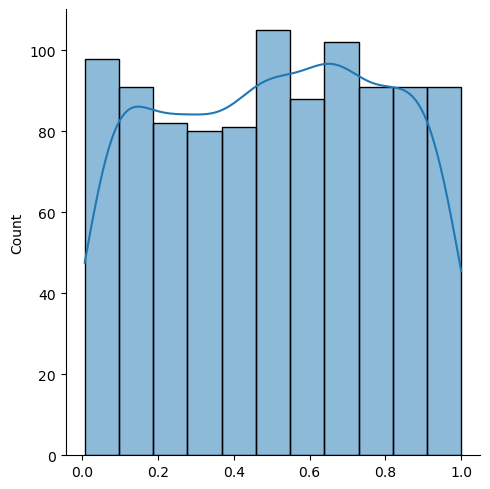

In [44]:
N = 1000

amostra_uniform = np.random.uniform(0, 1, N)

sns.displot(amostra_uniform, kde=True)

plt.show()

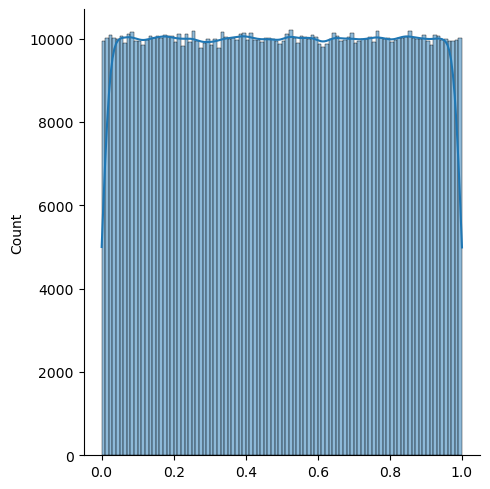

In [45]:
N = 1000000

amostra_uniform = np.random.uniform(0, 1, N)

sns.displot(amostra_uniform, kde=True)

plt.show()

## 

## Exercícios

__1)__ Em uma caixa há 7 bolas brancas, 4 pretas e 5 vermelhas. Retira-se 6 bolas com reposição. Calcule a probabilidade de que:

__A)__ saiam 4 bolas vermelhas:

__B)__ pelo menos 3 bolas brancas:

__C)__ 1 ou 2 bolas pretas.

In [ ]:
from math import factorial


def binomial(n, p, k):
    C = (factorial(n) / (factorial(n - k) * factorial(k)))
    return C * np.power(p, k) * np.power(1 - p, n - k)

In [ ]:
# numero de retiradas
n = 6

# numero de vermelhas
k = 4

# probabilidade de uma bola vermelha
p = 5 / 16

# print do resultado teorico
print("A probabilidade será: ", np.round(binomial(n, p, k), 4))

In [ ]:
# numero de retiradas
n = 6

# probabilidade de uma bola branca
p = 7 / 16

# calculando a probabilidade acumulativa
prop = 0
for k in range(3, 7):
    prop += binomial(n, p, k)

# PRint da probabilidade
print("A probabilidade será: ", np.round(prop, 4))

In [ ]:
# numero de retiradas
n = 6

# probabilidade de uma bola preta
p = 4 / 16

# calculando a probabilidade acumulativa
prop = 0
for k in range(1, 3):
    prop += binomial(n, p, k)

# PRint da probabilidade
print("A probabilidade será: ", np.round(prop, 4))

## 

__2)__ Em um livro de 800 páginas há 800 erros de impressão. Qual a probabilidade de que uma página contenha pelo menos 3 erros?

In [ ]:
# Define o poisson
def Poisson(lbd, k):
    return np.exp(-lbd)*(lbd**k)/factorial(k)


# lambda
lbd = 800/800

# zera a probabilidade
prop = 0

# loop para os casos
for k in range(0, 3):
    prop += Poisson(lbd, k)

# print do resultado
# Obs P(X >= 3) = 1 - P(X < 3) = 1 - [P(X = 0) + P(X = 1) + P(X = 2)]
print("P(X >= 3) = ", 1-prop)

## 

__3)__ Numa criação de coelhos, 45% são machos. Qual a probabilidade de nascerem pelo menos 5 coelhos machos num dia em que nasceram 15 coelhos?

In [ ]:
# numero de coelhos recem nascidos
n = 15

# probabilidade de macho
p = 0.45

# calculando a probabilidade acumulativa
prop = 0
for k in range(0, 5):
    prop += binomial(n, p, k)

# PRint da probabilidade
# Obs: P(X >= 5) = 1 - P(X < 5) = 1 - [P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4)]
print("A probabilidade será: ", 1-prop)

## 

__4)__ Numa estrada há 2 acidentes para cada 100 km. Qual a probabilidade de que em:

__A)__ 250 km pelo menos 3 acidentes?

In [47]:
# Distribuição de poisson

lbd = 5  # taxa: 2 acidentes/ 100km Para 250km = 5 acidentes = 250*2/100

# k >= 3   # evento - frequencia procurada
# não pode acontecer 

rv = stats.poisson(lbd)
rv.pmf(k)

print("P(k >= 3) = ", 1 - (rv.pmf(0)+ rv.pmf(1)+rv.pmf(2)))

P(k >= 3) =  0.8753479805169189


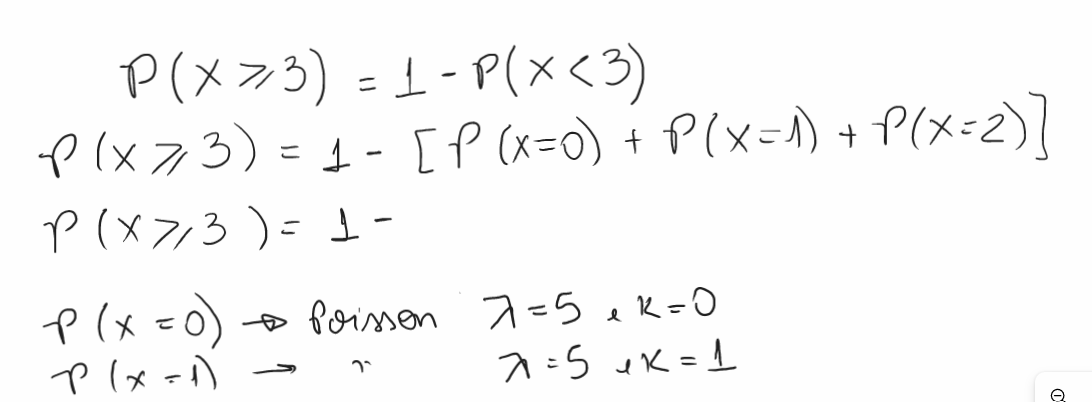

__B)__ 300 km ocorram 5 acidentes?

In [49]:
lbd = (300*2)/100

k = 5
rv = stats.poisson(lbd)
rv.pmf(k)

print("P(k = 5) = ", rv.pmf(5))

P(k = 5) =  0.16062314104797995
